In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd 

In [2]:
df=pd.read_csv("Dataset/dataMoreClasses.csv")
display(df.head())

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


<Axes: xlabel='Feeling'>

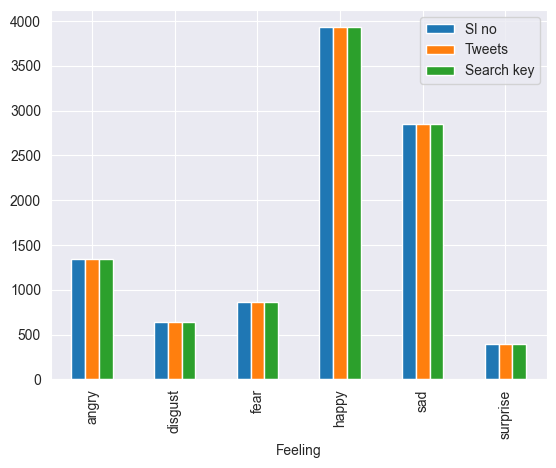

In [3]:
df.groupby('Feeling').count().plot(kind='bar')

C:\Users\Tayyab Anees\AppData\Local\Temp\ipykernel_18112\3873974640.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby('Feeling', group_keys=False).apply(lambda x: x.sample(min_count))


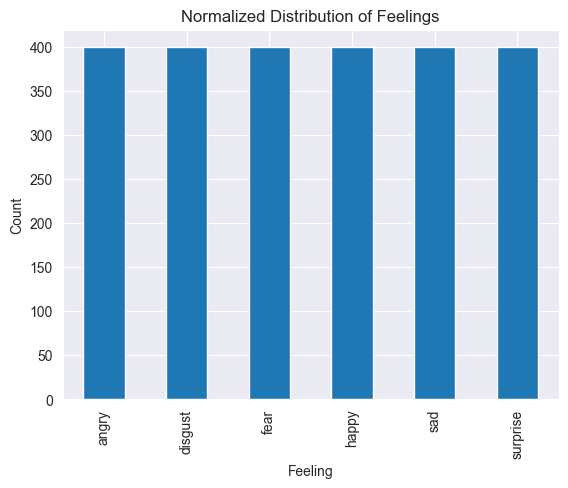

In [5]:
df.describe(include='all')
df['length'] = df['Tweets'].apply(len)
df.head()
graph = sns.FacetGrid(data=df,col='Feeling')
graph.map(plt.hist,'length',bins=50,color='Purple')

In [6]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df1, category):
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df1[df1.Feeling==category]['Tweets']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
wordcount_gen(df, 'happy')
wordcount_gen(df, 'sad')
wordcount_gen(df, 'angry')
wordcount_gen(df, 'fear')
wordcount_gen(df, 'disgust')
wordcount_gen(df, 'surprise')

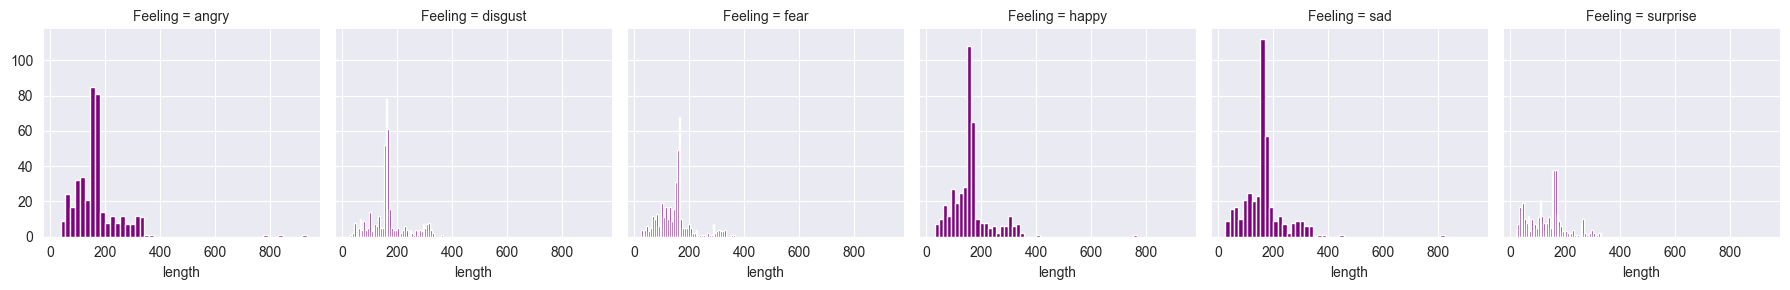

In [7]:
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def text_processing(text):
    # convert to lowercase
    text = text.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # tokenize
    words = word_tokenize(text)
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply Lemmatizer
    lm = nltk.WordNetLemmatizer()
    words = [lm.lemmatize(w) for w in words]
    # return list
    sentence = ' '.join(words)
    return sentence

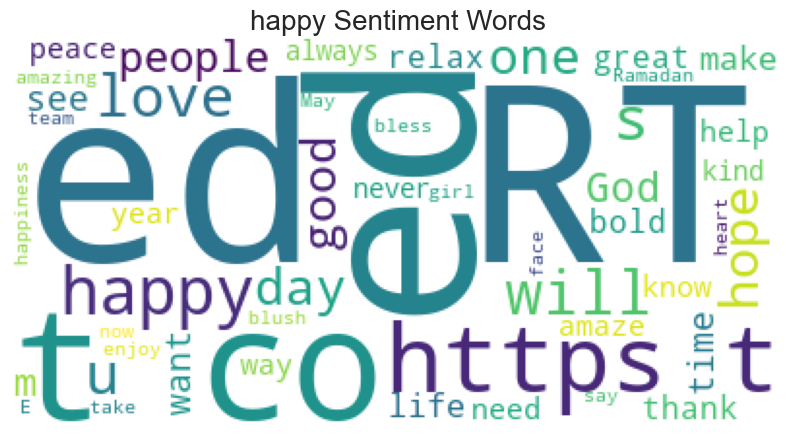

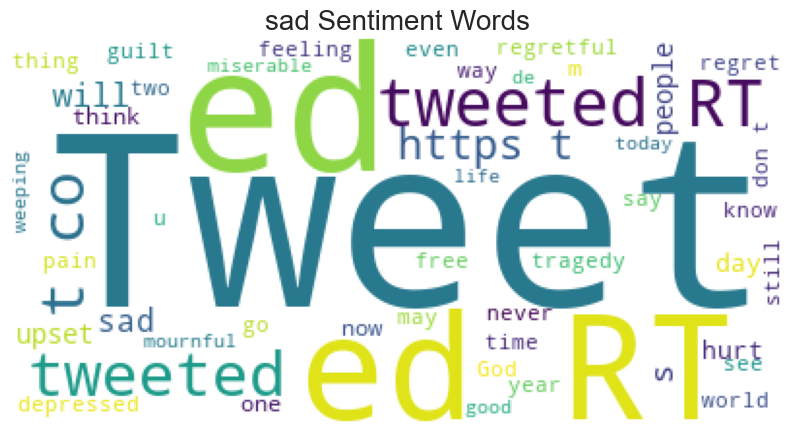

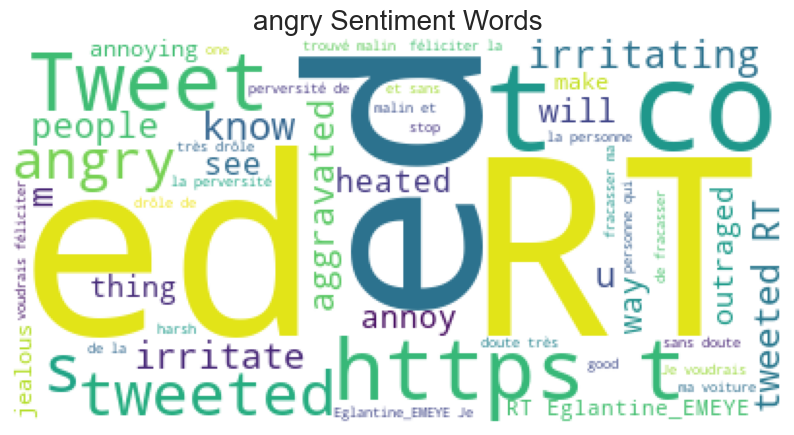

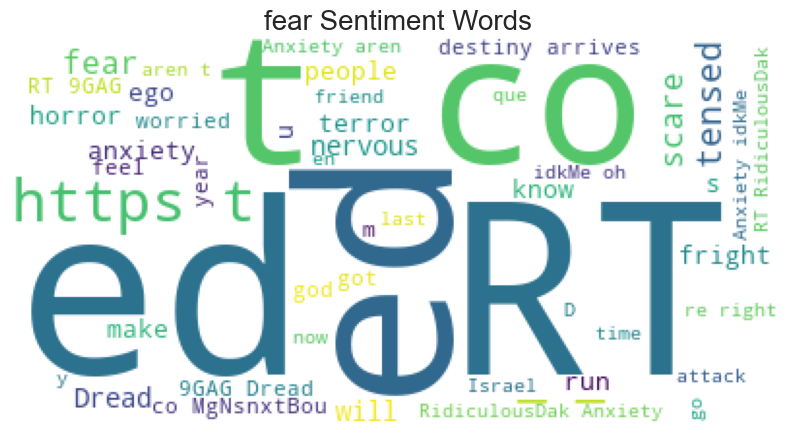

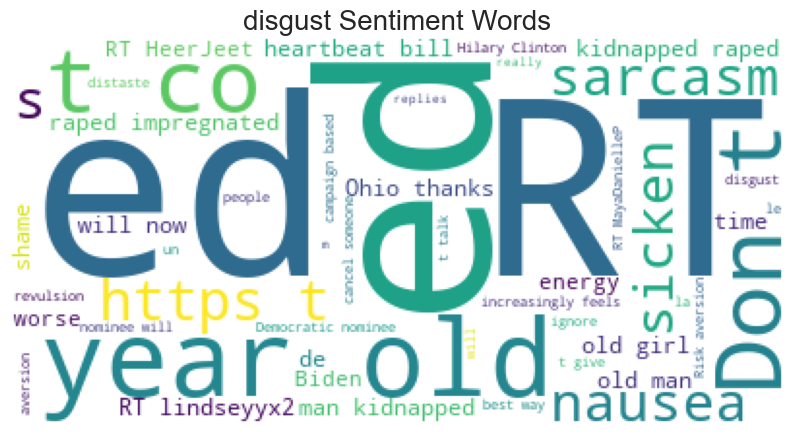

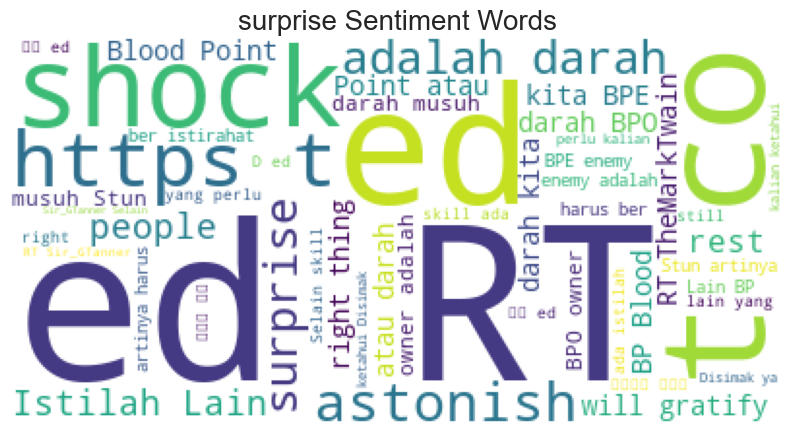

In [8]:
df['Tweets'] = list(map(text_processing, df['Tweets']))
df.head()

In [9]:
import token
cv = CountVectorizer(ngram_range = (1,1))
text_counts= cv.fit_transform(df['Tweets'])
tf=TfidfVectorizer()
transformeddata= tf.fit_transform(df['Tweets'])
transformeddata

[nltk_data] Downloading package stopwords to C:\Users\Tayyab
[nltk_data]     Anees\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tayyab
[nltk_data]     Anees\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Tayyab
[nltk_data]     Anees\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
x=transformeddata
y=df['Feeling']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

,Sl no,Tweets,Search key,Feeling,length
5063,5067,big head ed fezekiledumisa dang little harsh,harsh,angry,59
2602,2604,moses ed rt samuoeno way annoy mum bored http ...,annoy,angry,98
2890,2892,one ed rt drawtydevil make furious fuckoffglaz...,furious,angry,100
9945,9949,tweet krizel tweeted osnapitstepha huhu otso d...,irritating,angry,162
2772,2774,darrell wayne hughes ed jtruzmah benshapiro pr...,displease,angry,271


In [11]:
class_labels = ['happy', 'sad','angry','fear','disgust','surprise']
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
CR=confusion_matrix(y_test,preddt)
# Create confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(CR, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<2394x12540 sparse matrix of type '<class 'numpy.float64'>'
	with 37138 stored elements in Compressed Sparse Row format>

In [12]:
score = round(accuracy_score(y_test,preddt)*100,2)
print("Score:",score)

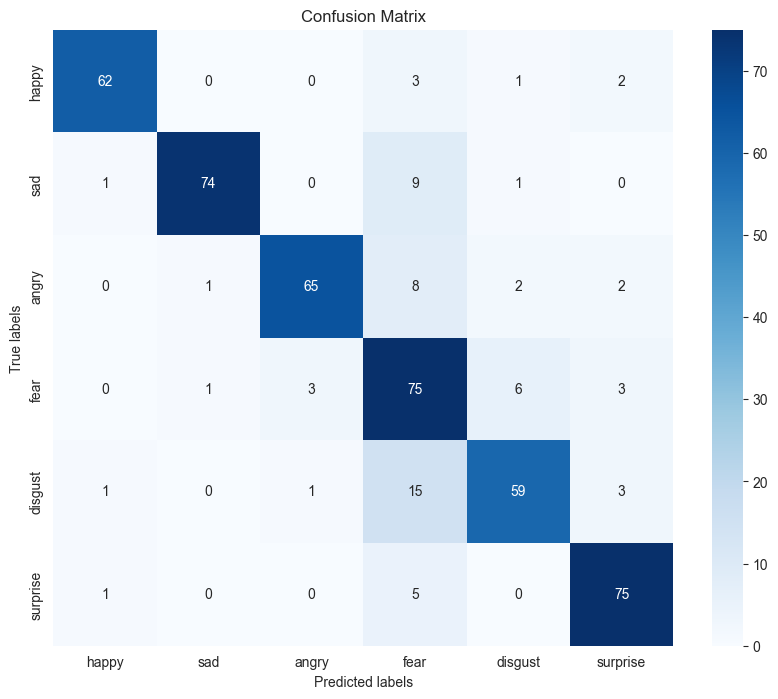

In [13]:
tf.fit(df['Tweets'])
stra='i am so lonely'
stra=text_processing(stra)
stra=tf.transform([stra])
preddt=dt.predict(stra)
preddt

In [14]:
import joblib
joblib.dump(tf, 'Helper/tfidf_vectorizer.pkl')

Score: 85.59


In [19]:
# Load the saved TfidfVectorizer
tf_loaded = joblib.load('Helper/tfidf_vectorizer.pkl')

array(['surprise'], dtype=object)

In [20]:
stra='i am so scared'
stra=text_processing(stra)
stra=tf_loaded.transform([stra])
preddt=dt.predict(stra)
preddt

['Helper/tfidf_vectorizer.pkl']

In [21]:
# Save the trained Decision Tree Classifier to a file
joblib.dump(dt, 'Models/decision_tree_classifier.pkl')

In [22]:
#Unseen datat
pred=dt.predict(transformeddata)
pred

array(['happy'], dtype=object)

In [23]:
# Convert the NumPy array to a DataFrame
pred_df = pd.DataFrame({'Feeling': pred})
# Now you can use the groupby() method
pred_df.groupby('Feeling').size().plot(kind='bar'
                                    )

['Models/decision_tree_classifier.pkl']

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import joblib
from sklearn.tree import DecisionTreeClassifier

class_labels = ['happy', 'sad','angry','fear','disgust','surprise']
loaded_dt = joblib.load('Models/decision_tree_classifier.pkl')
tfidf_vectorizer = joblib.load('Helper/tfidf_vectorizer.pkl')
plt.figure(figsize=(200, 150))
plot_tree(loaded_dt, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=class_labels)
plt.savefig('decision_tree_visualization.png')  # Save the visualization as an image file
plt.show()

array(['angry', 'angry', 'angry', ..., 'surprise', 'surprise', 'surprise'],
      dtype=object)

<Axes: xlabel='Feeling'>

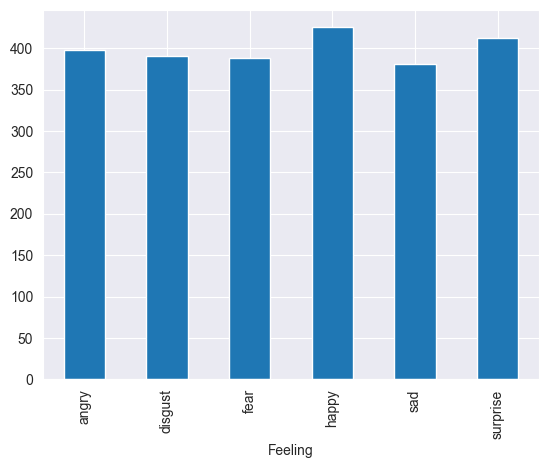